# **Project 2**, APS1070 Winter 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Feb 28, 11 PM - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Zheyuan Fan
*   Student Number: 1004099600

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____ **[0.1]**
* What features in the dataset are present aside from the 28 main features?  _____ **[0.1]**
* Which column contains the targets? **[0.1]**
* What is the meaning of target values?_____ **[0.1]**

In [1]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

  2% [.                                                   ]  1499136 / 68750473

  4% [..                                                  ]  2809856 / 68750473

  8% [....                                                ]  5947392 / 68750473

 13% [......                                              ]  9084928 / 68750473

 17% [.........                                           ] 12369920 / 68750473

 22% [...........                                         ] 15466496 / 68750473

 27% [..............                                      ] 19185664 / 68750473

 33% [.................                                   ] 22831104 / 68750473

 38% [....................                                ] 26558464 / 68750473

 43% [......................                              ] 30162944 / 68750473

 46% [........................                            ] 31834112 / 68750473

 48% [........................                            ] 33046528 / 68750473

 51% [..........................                          ] 35602432 / 68750473

 55% [............................                        ] 38125568 / 68750473

 59% [..............................                      ] 40648704 / 68750473

 63% [................................                    ] 43343872 / 68750473

 66% [..................................                  ] 46022656 / 68750473

 70% [....................................                ] 48644096 / 68750473

 74% [......................................              ] 51396608 / 68750473

 77% [........................................            ] 52969472 / 68750473

 84% [............................................        ] 58261504 / 68750473

 87% [.............................................       ] 60456960 / 68750473

 92% [...............................................     ] 63455232 / 68750473

 96% [.................................................   ] 66035712 / 68750473

100% [....................................................] 68750473 / 68750473

'creditcard.tar.gz'

In [3]:
!tar -zxvf creditcard.tar.gz

x creditcard.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### 1. 
There are 284807 rows. 

#### 2. 
"Time", "Amount" and "Class" are present aside from the 28 main features.

#### 3. 
The last (31st) column contains the target, which is whether a fraud or not.

#### 4. 
The target values correspond to 0 and 1, meaning not a fraud and is a fraud, respectively.

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.5]**
* What metrics should we use to evaluate a model in such cases _________ **[0.2]**


#### 5.

In [6]:
print(round(df.Class.mean()*100, 4))
print(round((1-df.Class.mean())*100, 4))

0.1727
99.8273


The percentage of class "1" is approximately 0.1727%, while the percentage of class "0" is approximately 99.8273%.

#### 6. 
This data is considered as unbalanced, because most targets belong to class 0, the percentage of class "1" is below 0.2%:

#### 7. 
Balance/imbalance is important because most machine algorithms assume equal number of observations for each class. If the dataset is imbalanced, then the model would have have poor predictive performance for the minority class, which would cause a problem because in most of the cases, the minority class is more important (like fraud detection problem in this case) and predicting the minority class wrong is a bigger problem than predicting the majority class wrong. 

For KNN classifier, it would be easier to classify 0 as 1 because number of 0's are much higher than number of 1's (intuitively, there are possibly many 1's surrounding 0, for a high k, it would likely be the case that KNN classifies a "true 1" as "0"), which would cause a higher number of FNs, hence a low recall.

#### 8. 
I think recall is a good metric to evaluate the model, since we could have a sense of the percentage of "target observations" that are correctly classified. This is especially useful when we deal with, for example, fraud detections, which is often the case with imbalanced dataset. Precision is another good metric, but it is not useful for fraud detection problems, a metric of the combination of two, F1 score, balances the disadvantages of them. In conclusion, I think recall is the best metric, followed by F1 score, and precision.

Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [7]:
from sklearn.model_selection import train_test_split
np.random.seed(1070)

X_train_full, X_test = train_test_split(df.iloc[:, 1:29], train_size=0.85, random_state=40)
y_train_full, y_test = train_test_split(df.iloc[:, 30], train_size=0.85, random_state=40)

X_train, X_val = train_test_split(X_train_full, train_size=0.65/0.85, random_state=40)
y_train, y_val = train_test_split(y_train_full, train_size=0.65/0.85, random_state=40)

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

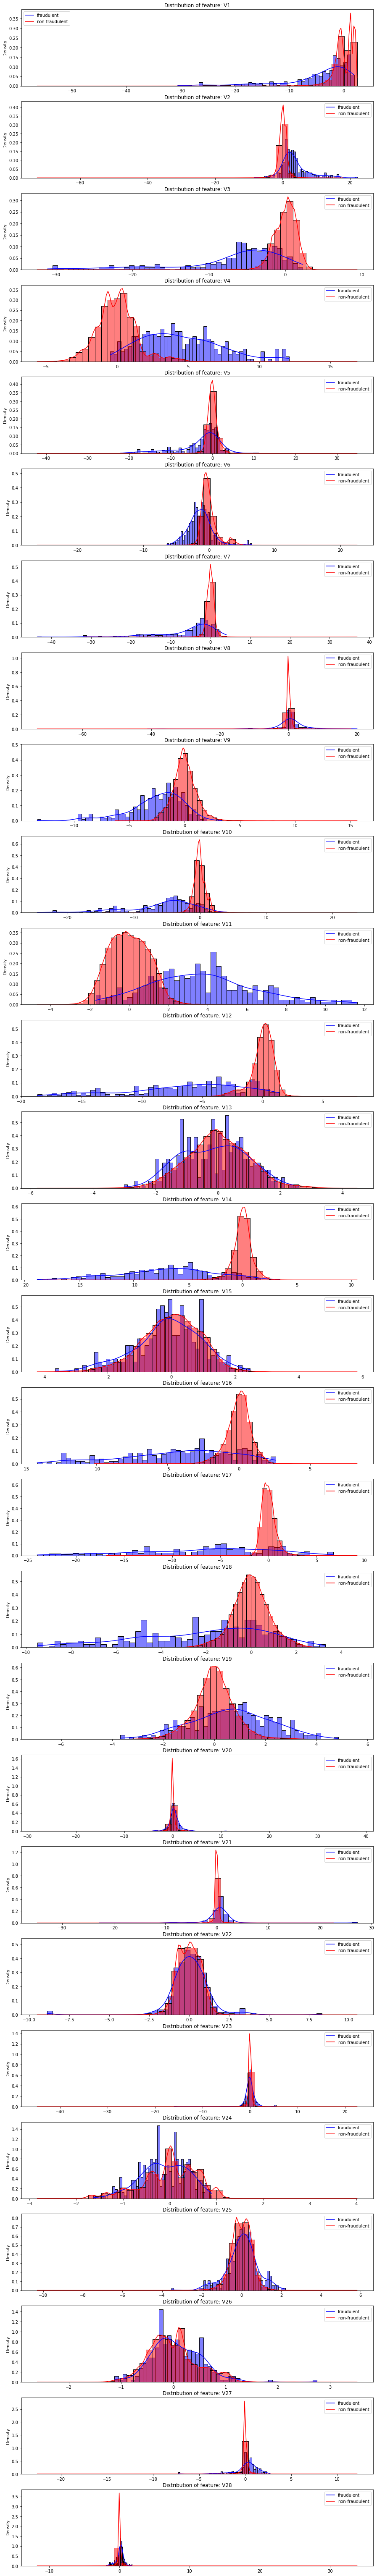

In [8]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

We can see that for some features, the distribution of fraudulent transactions is much different than non-fraudulent transactions, we can get a sense of whether it is a fraudulent or not by looking at the graphs. For example, if a transaction has a value that is less than -2 in V17, then it is very likely that this transaction is fradulent, because there were very few non-fradulent transactions that has V18 values below -2, because the density is extremly low for non-fradulent distribution.


## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**


In [9]:
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.metrics import *

### a.

#### 1.2.3.

In [10]:
gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)

In [11]:
# On training set
models_train = []
auc_score_train = []
p_gm_list_train = []
for i in range(X_train.shape[1]):
  models_train.append(gm.fit(X_train.iloc[:, i:i+1]))
  p_gm_train = models_train[i].score_samples(X_train.iloc[:, i:i+1])
  p_gm_list_train.append(p_gm_train)
  auc_score_train.append(roc_auc_score(y_train, 1-p_gm_train))
table1a = pd.DataFrame(auc_score_train, index = range(1, 29), columns = ['AUC of Gaussian Mixture of feature "V-", training set'])
table1a

,"AUC of Gaussian Mixture of feature ""V-"", training set"
1,0.692540
2,0.848245
3,0.870004
4,0.889715
5,0.761153
6,0.727997
7,0.865497
8,0.774903
9,0.799279
10,0.910025


In [12]:
# On validation set
models_val = []
auc_score_val = []
p_gm_list_val = []
for i in range(X_val.shape[1]):
  models_val.append(gm.fit(X_val.iloc[:, i:i+1]))
  p_gm_val = models_val[i].score_samples(X_val.iloc[:, i:i+1])
  p_gm_list_val.append(p_gm_val)
  auc_score_val.append(roc_auc_score(y_val, 1-p_gm_val))
table1b = pd.DataFrame(auc_score_val, index = range(1, 29), columns = ['AUC of Gaussian Mixture of feature "V-", validation set'])
table1b

,"AUC of Gaussian Mixture of feature ""V-"", validation set"
1,0.715479
2,0.852803
3,0.857128
4,0.883307
5,0.781091
6,0.720870
7,0.887199
8,0.790148
9,0.794019
10,0.917275


#### 4.

In [13]:
top_features = []
srted_auc = table1b.sort_values('AUC of Gaussian Mixture of feature "V-", validation set', ascending=False)
for i in srted_auc.index:
  top_features.append(i)
print('The top three features according to AUC are feature V', top_features[0],',V', top_features[1],',V', top_features[2], '.')

The top three features according to AUC are feature V 14 ,V 17 ,V 10 .


#### 5.

Text(0.5, 1.0, 'Histogram of log likelihood for each sample for feature V14')

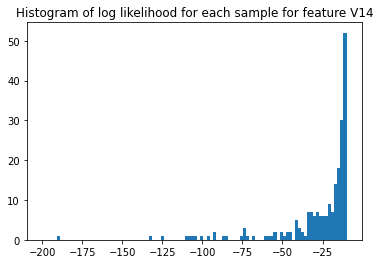

In [14]:
plt.hist(p_gm_list_val[13], range=[-200, -10], bins = 100)
plt.title('Histogram of log likelihood for each sample for feature V14')

In [15]:
# I will first tune thresholds between -200 and -10 to determine the best threshold as
# most log-likelihoods are fallen into the region from -10 to 0.

y_pred = [0] * len(y_val)
y_pred_14 = y_pred[:]
f1_score_V14 = []

def f1_V14(threshold: float):
  for i in range(len(p_gm_list_val[13])):
    if p_gm_list_val[13][i] <= threshold:
      y_pred_14[i] = 1
  return f1_score(y_val, y_pred_14)

for i in np.linspace(-200, -10, 100):
  f1_score_V14.append(f1_V14(i))
max(f1_score_V14)

0.6192893401015229

In [16]:
# Then I will narrow down the range of maximum F1-score, by looking at the results of f1_score_V14.
f1_score_V14

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.038461538461538464,
 0.038461538461538464,
 0.038461538461538464,
 0.05714285714285715,
 0.05714285714285715,
 0.05714285714285715,
 0.05714285714285715,
 0.05714285714285715,
 0.05714285714285715,
 0.05714285714285715,
 0.05714285714285715,
 0.05714285714285715,
 0.07547169811320754,
 0.093457943925

In [17]:
# It seems that the best F1-score is at somewhere between -23 and -16, I will try further
# to find it. 
y_pred_14 = y_pred[:]
f1_score_V14 = []
for i in np.linspace(-23, -16, 200):
  f1_score_V14.append(f1_V14(i))

best_thres_14 = np.linspace(-23, -16, 200)[np.argmax(f1_score_V14)]
print('The maximum F1-score for model based on V14 is:', max(f1_score_V14), 
      ', with a threshold of', best_thres_14)

The maximum F1-score for model based on V14 is: 0.6192893401015229 , with a threshold of -19.69346733668342


Text(0.5, 1.0, 'Histogram of log likelihood for each sample for feature V17')

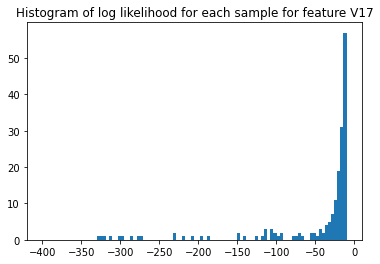

In [18]:
plt.hist(p_gm_list_val[16], range=[-400, -10], bins = 100)
plt.title('Histogram of log likelihood for each sample for feature V17')

In [19]:
y_pred_17 = y_pred[:]
f1_score_V17 = []

def f1_V17(threshold: float):
  for i in range(len(p_gm_list_val[16])):
    if p_gm_list_val[16][i] <= threshold:
      y_pred_17[i] = 1
  return f1_score(y_val, y_pred_17)

for i in np.linspace(-200, -10, 200):
  f1_score_V17.append(f1_V17(i))
max(f1_score_V17)

0.5942857142857142

In [20]:
f1_score_V17

[0.20869565217391303,
 0.20869565217391303,
 0.20869565217391303,
 0.20869565217391303,
 0.20869565217391303,
 0.2068965517241379,
 0.2068965517241379,
 0.2068965517241379,
 0.2068965517241379,
 0.2068965517241379,
 0.2068965517241379,
 0.2068965517241379,
 0.2068965517241379,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.20512820512820512,
 0.205128205128205

In [21]:
y_pred_17 = y_pred[:]
f1_score_V17 = []

for i in np.linspace(-50, -10, 200):
  f1_score_V17.append(f1_V17(i))

best_thres_17 = np.linspace(-50, -10, 200)[np.argmax(f1_score_V17)]

print('The maximum F1-score for model based on V17 is:', max(f1_score_V17), 
      ', with a threshold of', best_thres_17)

The maximum F1-score for model based on V17 is: 0.5977011494252873 , with a threshold of -22.261306532663315


Text(0.5, 1.0, 'Histogram of log likelihood for each sample for feature V10')

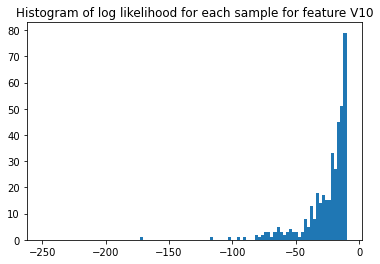

In [22]:
plt.hist(p_gm_list_val[9], range=[-250, -10], bins = 100)
plt.title('Histogram of log likelihood for each sample for feature V10')

In [23]:
# I will first tune thresholds between -250 and -10 to determine the best threshold as
# most log-likelihoods are fallen into the region from -10 to 0.
y_pred_10 = y_pred[:]
f1_score_V10 = []

def f1_V10(threshold: float):
  for i in range(len(p_gm_list_val[9])):
    if p_gm_list_val[9][i] <= threshold:
      y_pred_10[i] = 1
  return f1_score(y_val, y_pred_10)

for i in np.linspace(-250, -10, 100):
  f1_score_V10.append(f1_V10(i))
max(f1_score_V10)

0.20512820512820512

In [24]:
f1_score_V10

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.01941747572815534,
 0.038461538461538464,
 0.038461538461538464,
 0.038461538461538464,
 0.038461538461538464,
 0.038461538461538464,
 0.038461538461538464,
 0.03809523809523809,
 0.03809523809523809,
 0.03809523809523809,
 0.056603773584905655,
 0.056603773584905655,
 0.056603773584905655,
 0.07476635514018691,
 0.0747

In [25]:
# It seems that the best F1-score is at somewhere between -75 and -55, so I will try between this range
# to find it. 

y_pred_10 = y_pred[:]
f1_score_V10 = []

for i in np.linspace(-75, -55, 200):
  f1_score_V10.append(f1_V10(i))

best_thres_10 = np.linspace(-75, -55, 200)[np.argmax(f1_score_V10)]
print('The maximum F1-score for model based on V10 is:', max(f1_score_V10), 
      ', with a threshold of', best_thres_10)

The maximum F1-score for model based on V10 is: 0.20740740740740743 , with a threshold of -55.60301507537689


#### 6. 


In [26]:
AUC_14_train = float(table1a.iloc[13, :].values)
AUC_17_train = float(table1a.iloc[16, :].values)
AUC_10_train = float(table1a.iloc[9, :].values)

AUC_14_val = float(table1b.iloc[13, :].values)
AUC_17_val = float(table1b.iloc[16, :].values)
AUC_10_val = float(table1b.iloc[9, :].values)

In [27]:
y_pred = [0] * len(y_train)
y_pred_14 = y_pred[:]
f1_score_V14_train = []

def f1_V14(threshold: float):
  for i in range(len(p_gm_list_train[13])):
    if p_gm_list_train[13][i] <= threshold:
      y_pred_14[i] = 1
  return f1_score(y_train, y_pred_14)

for i in np.linspace(-23, -16, 200):
  f1_score_V14_train.append(f1_V14(i))

print('The maximum F1-score for model (training set), based on V14 is:', max(f1_score_V14_train))

The maximum F1-score for model (training set), based on V14 is: 0.6109215017064846


In [28]:
y_pred = [0] * len(y_train)
y_pred_17 = y_pred[:]
f1_score_V17_train = []

def f1_V17(threshold: float):
  for i in range(len(p_gm_list_train[16])):
    if p_gm_list_train[16][i] <= threshold:
      y_pred_17[i] = 1
  return f1_score(y_train, y_pred_17)

for i in np.linspace(-50, -10, 200):
  f1_score_V17_train.append(f1_V17(i))

print('The maximum F1-score for model (training set), based on V17 is:', max(f1_score_V17_train))

The maximum F1-score for model (training set), based on V17 is: 0.5780525502318393


In [29]:
y_pred = [0] * len(y_train)
y_pred_10 = y_pred[:]
f1_score_V10_train = []

def f1_V10(threshold: float):
  for i in range(len(p_gm_list_train[9])):
    if p_gm_list_train[9][i] <= threshold:
      y_pred_10[i] = 1
  return f1_score(y_train, y_pred_10)

for i in np.linspace(-75, -55, 200):
  f1_score_V10_train.append(f1_V10(i))

print('The maximum F1-score for model (training set), based on V10 is:', max(f1_score_V10_train))

The maximum F1-score for model (training set), based on V10 is: 0.24821002386634844


In [30]:
precision_14_train = precision_score(y_train, p_gm_list_train[13] < best_thres_14)
precision_17_train = precision_score(y_train, p_gm_list_train[16] < best_thres_17)
precision_10_train = precision_score(y_train, p_gm_list_train[9] < best_thres_10)
recall_17_train = recall_score(y_train, p_gm_list_train[13] < best_thres_14)
recall_14_train = recall_score(y_train, p_gm_list_train[16] < best_thres_17)
recall_10_train = recall_score(y_train, p_gm_list_train[9] < best_thres_10)

metric_table_2a_train = pd.DataFrame(data = np.array([[AUC_14_train, AUC_17_train, AUC_10_train], 
                                             [precision_14_train, precision_17_train, precision_10_train],
                                             [recall_14_train, recall_17_train, recall_10_train],
                                             [max(f1_score_V14_train), max(f1_score_V17_train), max(f1_score_V10_train)]]))
metric_table_2a_train = metric_table_2a_train.T
metric_table_2a_train.columns = ['AUC - training set', 'Precision - training set', 'recall - training set', 'F1 score - training set']
metric_table_2a_train.index = ['V14', 'V17', 'V10']
metric_table_2a_train

,AUC - training set,Precision - training set,recall - training set,F1 score - training set
V14,0.948014,0.636678,0.496894,0.610922
V17,0.928937,0.661157,0.571429,0.578053
V10,0.910025,0.450000,0.167702,0.248210


In [31]:
precision_14_val = precision_score(y_val, p_gm_list_val[13] < best_thres_14)
precision_17_val = precision_score(y_val, p_gm_list_val[16] < best_thres_17)
precision_10_val = precision_score(y_val, p_gm_list_val[9] < best_thres_10)
recall_17_val = recall_score(y_val, p_gm_list_val[13] < best_thres_14)
recall_14_val = recall_score(y_val, p_gm_list_val[16] < best_thres_17)
recall_10_val = recall_score(y_val, p_gm_list_val[9] < best_thres_10)

metric_table_2a_val = pd.DataFrame(data = np.array([[AUC_14_val, AUC_17_val, AUC_10_val], 
                                             [precision_14_val, precision_17_val, precision_10_val],
                                             [recall_14_val, recall_17_val, recall_10_val],
                                             [max(f1_score_V14), max(f1_score_V17), max(f1_score_V10)]]))
metric_table_2a_val = metric_table_2a_val.T
metric_table_2a_val.columns = ['AUC - validation set', 'Precision - validation set', 'recall - validation set', 'F1 score - validation set']
metric_table_2a_val.index = ['V14', 'V17', 'V10']
metric_table_2a_val

,AUC - validation set,Precision - validation set,recall - validation set,F1 score - validation set
V14,0.955037,0.642105,0.509804,0.619289
V17,0.925756,0.722222,0.598039,0.597701
V10,0.917275,0.424242,0.137255,0.207407


#### 7.
The complexity of three functions, f1_V14, f1_V17, f1_V10, are $O(n^2)$ since each of them will run n times for the for loop, and inside the for loop, it is comparing and assigning a value to the list n times. Therefore, the complexity is $O(n^2)$.

### b.

#### 1.2.

In [32]:
X_train_non_frad = X_train.loc[df["Class"] == 0]
X_val_non_frad = X_val.loc[df["Class"] == 0]

X_train_non_frad_14 = X_train_non_frad.iloc[:, 13:14]
X_train_non_frad_17 = X_train_non_frad.iloc[:, 16:17]
X_train_non_frad_10 = X_train_non_frad.iloc[:, 10:11]

X_val_non_frad_14 = X_val_non_frad.iloc[:, 13:14]
X_val_non_frad_17 = X_val_non_frad.iloc[:, 16:17]
X_val_non_frad_10 = X_val_non_frad.iloc[:, 9:10]

gm14 = gm.fit(X_train_non_frad_14)
gm17 = gm.fit(X_train_non_frad_17)
gm10 = gm.fit(X_train_non_frad_10)

p_gm_train_non_frad_14 = gm14.score_samples(X_train.iloc[:, 13:14])
p_gm_train_non_frad_17 = gm17.score_samples(X_train.iloc[:, 16:17])
p_gm_train_non_frad_10 = gm10.score_samples(X_train.iloc[:, 9:10])

p_gm_val_non_frad_14 = gm14.score_samples(X_val.iloc[:, 13:14])
p_gm_val_non_frad_17 = gm17.score_samples(X_val.iloc[:, 16:17])
p_gm_val_non_frad_10 = gm10.score_samples(X_val.iloc[:, 9:10])

auc_non_frad_14_train = roc_auc_score(y_true = y_train, y_score = 1-p_gm_train_non_frad_14)
auc_non_frad_17_train = roc_auc_score(y_true = y_train, y_score = 1-p_gm_train_non_frad_17)
auc_non_frad_10_train = roc_auc_score(y_true = y_train, y_score = 1-p_gm_train_non_frad_10)

auc_non_frad_14 = roc_auc_score(y_true = y_val, y_score = 1-p_gm_val_non_frad_14)
auc_non_frad_17 = roc_auc_score(y_true = y_val, y_score = 1-p_gm_val_non_frad_17)
auc_non_frad_10 = roc_auc_score(y_true = y_val, y_score = 1-p_gm_val_non_frad_10)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- V14
Feature names seen at fit time, yet now missing:
- V11

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- V17
Feature names seen at fit time, yet now missing:
- V11

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- V10
Feature names seen at fit time, yet now missing:
- V11

  warnings.warn(message, FutureWarning)
/opt/anaconda3/l

In [33]:
y_pred = [0] * len(y_train)
y_pred_14 = y_pred[:]
f1_score_V14_train = []

def f1_V14(threshold: float):
  for i in range(len(p_gm_train_non_frad_14)):
    if p_gm_train_non_frad_14[i] <= threshold:
      y_pred_14[i] = 1
  return f1_score(y_train, y_pred_14)

for i in np.linspace(-200, -10, 100):
  f1_score_V14_train.append(f1_V14(i))

best_thres_14 = np.linspace(-25, -15, 100)[np.argmax(f1_score_V14_train)]
print('The maximum F1-score for model (non-fraudulent training set), based on V14 is:', max(f1_score_V14_train), 
      ', with a threshold of', best_thres_14)

The maximum F1-score for model (non-fraudulent training set), based on V14 is: 0.6078098471986417 , with a threshold of -15.505050505050505


In [34]:
y_pred = [0] * len(y_val)
y_pred_14 = y_pred[:]
f1_score_V14 = []

def f1_V14_val(threshold: float):
  for i in range(len(p_gm_val_non_frad_14)):
    if p_gm_val_non_frad_14[i] <= threshold:
      y_pred_14[i] = 1
  return f1_score(y_val, y_pred_14)

for i in np.linspace(-200, -10, 100):
  f1_score_V14.append(f1_V14_val(i))

print('The maximum F1-score for model (non-fraudulent validation set), based on V14 is:', max(f1_score_V14))

The maximum F1-score for model (non-fraudulent validation set), based on V14 is: 0.6192893401015229


In [35]:
y_pred = [0] * len(y_train)
y_pred_17 = y_pred[:]
f1_score_V17_train = []

def f1_V17(threshold: float):
  for i in range(len(p_gm_train_non_frad_17)):
    if p_gm_train_non_frad_17[i] <= threshold:
      y_pred_17[i] = 1
  return f1_score(y_train, y_pred_17)

for i in np.linspace(-50, -10, 200):
  f1_score_V17_train.append(f1_V17(i))

best_thres_17 = np.linspace(-50, -10, 200)[np.argmax(f1_score_V17_train)]
print('The maximum F1-score for model (non-fraudulent training set), based on V17 is:', max(f1_score_V17_train), 
      ', with a threshold of', best_thres_17)

The maximum F1-score for model (non-fraudulent training set), based on V17 is: 0.5780525502318393 , with a threshold of -12.211055276381906


In [36]:
y_pred = [0] * len(y_val)
y_pred_17 = y_pred[:]
f1_score_V17 = []

def f1_V17_val(threshold: float):
  for i in range(len(p_gm_val_non_frad_17)):
    if p_gm_val_non_frad_17[i] <= threshold:
      y_pred_17[i] = 1
  return f1_score(y_val, y_pred_17)

for i in np.linspace(-50, -10, 200):
  f1_score_V17.append(f1_V17_val(i))

print('The maximum F1-score for model (non-fraudulent validation set), based on V17 is:', max(f1_score_V17))

The maximum F1-score for model (non-fraudulent validation set), based on V17 is: 0.5942857142857142


In [37]:
y_pred = [0] * len(y_train)
y_pred_10 = y_pred[:]
f1_score_V10 = []

def f1_V10(threshold: float):
  for i in range(len(p_gm_train_non_frad_10)):
    if p_gm_train_non_frad_10[i] <= threshold:
      y_pred_10[i] = 1
  return f1_score(y_train, y_pred_10)

for i in np.linspace(-75, -55, 200):
  f1_score_V10_train.append(f1_V10(i))

best_thres_10 = np.linspace(-75, -55, 200)[np.argmax(f1_score_V10_train)]
print('The maximum F1-score for model (non-fraudulent training set) based on V10 is:', max(f1_score_V10_train), 
      ', with a threshold of', best_thres_10)

The maximum F1-score for model (non-fraudulent training set) based on V10 is: 0.24821002386634844 , with a threshold of -57.01005025125628


In [38]:
y_pred = [0] * len(y_val)
y_pred_10 = y_pred[:]
f1_score_V10 = []

def f1_V10_val(threshold: float):
  for i in range(len(p_gm_val_non_frad_10)):
    if p_gm_val_non_frad_10[i] <= threshold:
      y_pred_10[i] = 1
  return f1_score(y_val, y_pred_10)

for i in np.linspace(-75, -55, 200):
  f1_score_V10.append(f1_V10_val(i))

print('The maximum F1-score for model (non-fraudulent validation set) based on V10 is:', max(f1_score_V10))

The maximum F1-score for model (non-fraudulent validation set) based on V10 is: 0.20740740740740743


In [39]:
precision_14_train = precision_score(y_train, p_gm_train_non_frad_14 < best_thres_14)
precision_17_train = precision_score(y_train, p_gm_train_non_frad_17 < best_thres_17)
precision_10_train = precision_score(y_train, p_gm_train_non_frad_10 < best_thres_10)
recall_14_train = recall_score(y_train, p_gm_train_non_frad_14 < best_thres_14)
recall_17_train = recall_score(y_train, p_gm_train_non_frad_17 < best_thres_17)
recall_10_train = recall_score(y_train, p_gm_train_non_frad_10 < best_thres_10)

In [40]:
precision_14_val = precision_score(y_val, p_gm_val_non_frad_14 < best_thres_14)
precision_17_val = precision_score(y_val, p_gm_val_non_frad_17 < best_thres_17)
precision_10_val = precision_score(y_val, p_gm_val_non_frad_10 < best_thres_10)
recall_14_val = recall_score(y_val, p_gm_val_non_frad_14 < best_thres_14)
recall_17_val = recall_score(y_val, p_gm_val_non_frad_17 < best_thres_17)
recall_10_val = recall_score(y_val, p_gm_val_non_frad_10 < best_thres_10)

In [41]:
metric_table_2b_train = pd.DataFrame(data = np.array([[auc_non_frad_14_train, auc_non_frad_17_train, auc_non_frad_10_train], 
                                             [precision_14_train, precision_17_train, precision_10_train],
                                             [recall_14_train, recall_17_train, recall_10_train],
                                             [max(f1_score_V14_train), max(f1_score_V17_train), max(f1_score_V10_train)]]))
metric_table_2b_train = metric_table_2b_train.T
metric_table_2b_train.columns = ['AUC - training set', 'Precision - training set', 'recall - training set', 'F1 score - training set']
metric_table_2b_train.index = ['V14', 'V17', 'V10']
metric_table_2b_train

,AUC - training set,Precision - training set,recall - training set,F1 score - training set
V14,0.947845,0.554598,0.599379,0.607810
V17,0.929226,0.575385,0.580745,0.578053
V10,0.909938,0.341463,0.173913,0.248210


In [42]:
metric_table_2b_val = pd.DataFrame(data = np.array([[auc_non_frad_14, auc_non_frad_17, auc_non_frad_10], 
                                             [precision_14_val, precision_17_val, precision_10_val],
                                             [recall_14_val, recall_17_val, recall_10_val],
                                             [max(f1_score_V14), max(f1_score_V17), max(f1_score_V10)]]))
metric_table_2b_val = metric_table_2b_val.T
metric_table_2b_val.columns = ['AUC - validation set', 'Precision - validation set', 'recall - validation set', 'F1 score - validation set']
metric_table_2b_val.index = ['V14', 'V17', 'V10']
metric_table_2b_val

,AUC - validation set,Precision - validation set,recall - validation set,F1 score - validation set
V14,0.955123,0.590476,0.607843,0.619289
V17,0.925952,0.600000,0.558824,0.594286
V10,0.917259,0.350000,0.137255,0.207407


#### 3.


In [43]:
indices = ['V14 (a)', 'V17 (a)', 'V10 (a)', 'V14 (b)', 'V17 (b)', 'V10 (b)']
compare_table_train = pd.concat([metric_table_2a_train, metric_table_2b_train])
compare_table_train.index = indices
compare_table_train

,AUC - training set,Precision - training set,recall - training set,F1 score - training set
V14 (a),0.948014,0.636678,0.496894,0.610922
V17 (a),0.928937,0.661157,0.571429,0.578053
V10 (a),0.910025,0.450000,0.167702,0.248210
V14 (b),0.947845,0.554598,0.599379,0.607810
V17 (b),0.929226,0.575385,0.580745,0.578053
V10 (b),0.909938,0.341463,0.173913,0.248210


In [44]:
indices = ['V14 (a)', 'V17 (a)', 'V10 (a)', 'V14 (b)', 'V17 (b)', 'V10 (b)']
compare_table_val = pd.concat([metric_table_2a_val, metric_table_2b_val])
compare_table_val.index = indices
compare_table_val

,AUC - validation set,Precision - validation set,recall - validation set,F1 score - validation set
V14 (a),0.955037,0.642105,0.509804,0.619289
V17 (a),0.925756,0.722222,0.598039,0.597701
V10 (a),0.917275,0.424242,0.137255,0.207407
V14 (b),0.955123,0.590476,0.607843,0.619289
V17 (b),0.925952,0.600000,0.558824,0.594286
V10 (b),0.917259,0.350000,0.137255,0.207407


#### 4.

In [45]:
# Show the differences in metrics for two parts, 2a and 2b, on training set.
diff_matrix_train = metric_table_2b_train - metric_table_2a_train
diff_matrix_train.columns = ['Difference in AUC - training set', 'Difference in Precision - training set',
                       'Difference in Recall - training set', 'Difference in F1 score - training set']
diff_matrix_train

,Difference in AUC - training set,Difference in Precision - training set,Difference in Recall - training set,Difference in F1 score - training set
V14,-0.000169,-0.082080,0.102484,-0.003112
V17,0.000290,-0.085772,0.009317,0.000000
V10,-0.000087,-0.108537,0.006211,0.000000


In [46]:
# Show the differences in metrics for two parts, 2a and 2b, on validation set.
diff_matrix_val = metric_table_2b_val - metric_table_2a_val
diff_matrix_val.columns = ['Difference in AUC - validation set', 'Difference in Precision - validation set',
                       'Difference in Recall - validation set', 'Difference in F1 score - validation set']
diff_matrix_val

,Difference in AUC - validation set,Difference in Precision - validation set,Difference in Recall - validation set,Difference in F1 score - validation set
V14,0.000086,-0.051629,0.098039,0.000000
V17,0.000196,-0.122222,-0.039216,-0.003415
V10,-0.000016,-0.074242,0.000000,0.000000


We can see that the differences for two parts' results are relatively small, the results are very similar.

This is because we fitted the same Gaussian model to in both part(a) and (b). But in part (b) we computed the sample scores on only class "1", fraud transactions, where as in part(a) we computed sample scores on both classes. It seem that there were few class "1" observations, so the results are very similar.

## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 




### a.

#### 1.2.3.

In [47]:
X_train_scatter = pd.concat([X_train, y_train], axis = 1)
X_val_scatter = pd.concat([X_val, y_val], axis = 1)

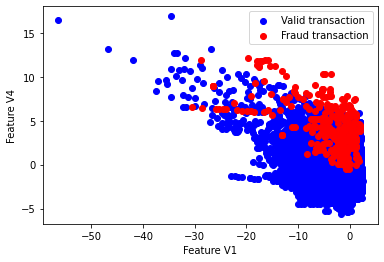

In [48]:
# Feature V1 and feature V4.
plt.scatter(X_train_scatter.loc[X_train_scatter['Class'] == 0]['V1'],
            X_train_scatter.loc[X_train_scatter['Class'] == 0]['V4'],
            color = 'blue', label = 'Valid transaction')

plt.scatter(X_train_scatter.loc[X_train_scatter['Class'] == 1]['V1'],
            X_train_scatter.loc[X_train_scatter['Class'] == 1]['V4'],
            color = 'red', label = 'Fraud transaction')

plt.xlabel('Feature V1')
plt.ylabel('Feature V4')
plt.legend()
plt.show()

#### 4.

I picked V1 and V4 (randomly). Based on the plot, I think 2 number of Gaussian components would be good to fit the data. It seems that data points with x-values (V1 values) from -20 to 0 are a Gaussian; while data with x-values from -40 to -20 forms another Gaussian.

#### 5.

In [49]:
gm_2cpnt = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0)

In [50]:
model_1_4_train = gm_2cpnt.fit(pd.concat([X_train[['V1']], X_train[['V4']]], axis=1))
p_gm_1_4_train = model_1_4_train.score_samples(pd.concat([X_train[['V1']], X_train[['V4']]], axis=1))
auc_score_1_4_train = roc_auc_score(y_train, 1-p_gm_1_4_train)

#### 6.

In [51]:
model_1_4_val = gm_2cpnt.fit(pd.concat([X_val[['V1']], X_val[['V4']]], axis=1))
p_gm_1_4_val = model_1_4_val.score_samples(pd.concat([X_val[['V1']], X_val[['V4']]], axis=1))
auc_score_1_4_val = roc_auc_score(y_val, 1-p_gm_1_4_val)

In [52]:
print('The AUC on training set is:', auc_score_1_4_train, '\nThe AUC on validation set is:', auc_score_1_4_val)

The AUC on training set is: 0.9049722647772771 
The AUC on validation set is: 0.8996625699171684


#### 7.

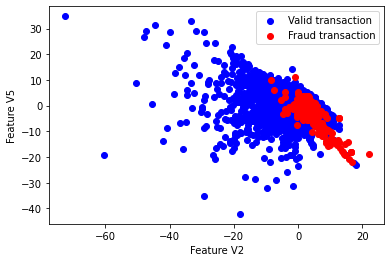

In [53]:
# Feature V2 and feature V5.
plt.scatter(X_train_scatter.loc[X_train_scatter['Class'] == 0]['V2'],
            X_train_scatter.loc[X_train_scatter['Class'] == 0]['V5'],
            color = 'blue', label = 'Valid transaction')

plt.scatter(X_train_scatter.loc[X_train_scatter['Class'] == 1]['V2'],
            X_train_scatter.loc[X_train_scatter['Class'] == 1]['V5'],
            color = 'red', label = 'Fraud transaction')

plt.xlabel('Feature V2')
plt.ylabel('Feature V5')
plt.legend()
plt.show()

I picked V2 and V5 (randomly). Based on the plot, I think 2 number of Gaussian components would be good to fit the data. It seems that data points with x-values (V2 value) from -25 to 0 "are a Gaussian"; while data with x-values from -50 to -25 forms another Gaussian.

In [54]:
model_2_5_train = gm_2cpnt.fit(pd.concat([X_train[['V2']], X_train[['V5']]], axis=1))
p_gm_2_5_train = model_2_5_train.score_samples(pd.concat([X_train[['V2']], X_train[['V5']]], axis=1))
auc_score_2_5_train = roc_auc_score(y_train, 1-p_gm_2_5_train)

model_2_5_val = gm_2cpnt.fit(pd.concat([X_val[['V2']], X_val[['V5']]], axis=1))
p_gm_2_5_val = model_2_5_val.score_samples(pd.concat([X_val[['V2']], X_val[['V5']]], axis=1))
auc_score_2_5_val = roc_auc_score(y_val, 1-p_gm_2_5_val)

In [55]:
print('The AUC on training set is:', auc_score_2_5_train, '\nThe AUC on validation set is:', auc_score_2_5_val)

The AUC on training set is: 0.8661461795348706 
The AUC on validation set is: 0.8786089673294573


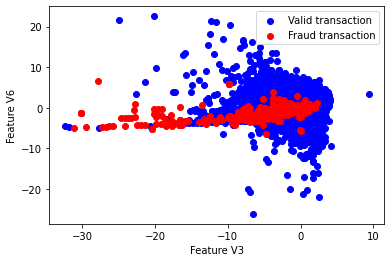

In [56]:
# Feature V3 and feature V6.
plt.scatter(X_train_scatter.loc[X_train_scatter['Class'] == 0]['V3'],
            X_train_scatter.loc[X_train_scatter['Class'] == 0]['V6'],
            color = 'blue', label = 'Valid transaction')

plt.scatter(X_train_scatter.loc[X_train_scatter['Class'] == 1]['V3'],
            X_train_scatter.loc[X_train_scatter['Class'] == 1]['V6'],
            color = 'red', label = 'Fraud transaction')

plt.xlabel('Feature V3')
plt.ylabel('Feature V6')
plt.legend()
plt.show()

I picked V3 and V6 (randomly). Based on the plot, I think 2 number of Gaussian components would be good to fit the data. It seems that data points with x-values (V2 value) from -10 to 5 "are a Gaussian"; while data with x-values from -25 to -10 forms another Gaussian.

In [57]:
model_3_6_train = gm_2cpnt.fit(pd.concat([X_train[['V3']], X_train[['V6']]], axis=1))
p_gm_3_6_train = model_3_6_train.score_samples(pd.concat([X_train[['V3']], X_train[['V6']]], axis=1))
auc_score_3_6_train = roc_auc_score(y_train, 1-p_gm_3_6_train)

model_3_6_val = gm_2cpnt.fit(pd.concat([X_val[['V3']], X_val[['V6']]], axis=1))
p_gm_3_6_val = model_3_6_val.score_samples(pd.concat([X_val[['V3']], X_val[['V6']]], axis=1))
auc_score_3_6_val = roc_auc_score(y_val, 1-p_gm_3_6_val)

In [58]:
print('The AUC on training set is:', auc_score_3_6_train, '\nThe AUC on validation set is:', auc_score_3_6_val)

The AUC on training set is: 0.8631337902805707 
The AUC on validation set is: 0.8649627913071665


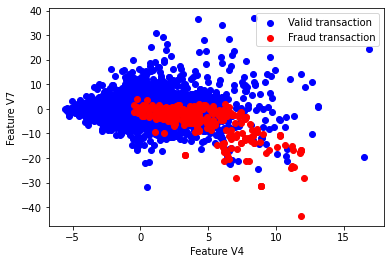

In [59]:
# Feature V4 and feature V7.
plt.scatter(X_train_scatter.loc[X_train_scatter['Class'] == 0]['V4'],
            X_train_scatter.loc[X_train_scatter['Class'] == 0]['V7'],
            color = 'blue', label = 'Valid transaction')

plt.scatter(X_train_scatter.loc[X_train_scatter['Class'] == 1]['V4'],
            X_train_scatter.loc[X_train_scatter['Class'] == 1]['V7'],
            color = 'red', label = 'Fraud transaction')

plt.xlabel('Feature V4')
plt.ylabel('Feature V7')
plt.legend()
plt.show()

I picked V4 and V7 (randomly). Based on the plot, I think 2 number of Gaussian components would be good to fit the data. It seems that data points with x-values (V2 value) from -5 to 7 "are a Gaussian"; while data with x-values from 7 to 13 forms another Gaussian.

In [60]:
df_4_7_train = pd.concat([X_train[['V4']], X_train[['V7']]], axis=1)
model_4_7_train = gm_2cpnt.fit(df_4_7_train)
p_gm_4_7_train = model_4_7_train.score_samples(df_4_7_train)
auc_score_4_7_train = roc_auc_score(y_train, 1-p_gm_4_7_train)

df_4_7_val = pd.concat([X_val[['V4']], X_val[['V7']]], axis=1)
model_4_7_val = gm_2cpnt.fit(df_4_7_val)
p_gm_4_7_val = model_4_7_val.score_samples(df_4_7_val)
auc_score_4_7_val = roc_auc_score(y_val, 1-p_gm_4_7_val)

In [61]:
print('The AUC on training set is:', auc_score_4_7_train,
      '\nThe AUC on validation set is:', auc_score_4_7_val)

The AUC on training set is: 0.9295428444920154 
The AUC on validation set is: 0.934922892829309


#### 8. 
I will pick feature V4 and V7 to be the set, since their model has the highest AUC on validation set (as well as training set).

#### 9.

Text(0.5, 1.0, 'Histogram of log likelihood for each sample for feature V4 and V7')

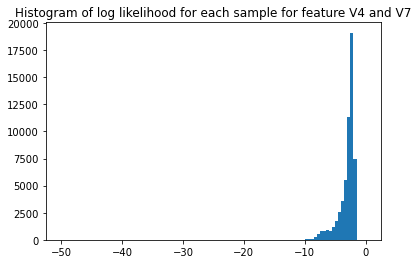

In [62]:
plt.hist(p_gm_4_7_val, range=[-50, 0], bins = 100)
plt.title('Histogram of log likelihood for each sample for feature V4 and V7')

In [63]:
# I will first tune thresholds between -50 and -1 to determine the best threshold.

y_pred = [0] * len(y_val)
y_pred_4_7 = y_pred[:]
f1_score_V4_V7 = []

def f1_V4_V7(threshold: float):
  for i in range(len(p_gm_4_7_val)):
    if p_gm_4_7_val[i] <= threshold:
      y_pred_4_7[i] = 1
  return f1_score(y_val, y_pred_4_7)

for i in np.linspace(-50, -1, 100):
  f1_score_V4_V7.append(f1_V4_V7(i))
max(f1_score_V4_V7)

0.27096774193548384

In [64]:
# Then I will narrow down the range of maximum F1-score, by looking at the results of f1_score_V14.
f1_score_V4_V7

[0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.037383177570093455,
 0.037383177570093455,
 0.037383177570093455,
 0.037037037037037035,
 0.03669724770642201,
 0.03636363636363636,
 0.036036036036036036,
 0.036036036036036036,
 0.0360360360

In [65]:
# It seems that the best F1-score is at somewhere between -16 and -10, so I will try between this range
# to find it. 
y_pred_4_7 = y_pred[:]
f1_score_V4_V7 = []
for i in np.linspace(-16, -10, 200):
  f1_score_V4_V7.append(f1_V4_V7(i))

best_thres_4_7 = np.linspace(-16, -10, 200)[np.argmax(f1_score_V4_V7)]
print('The maximum F1-score for model based on V4 and V7 is:', max(f1_score_V4_V7), 
      ', with a threshold of', best_thres_4_7)

The maximum F1-score for model based on V4 and V7 is: 0.2727272727272727 , with a threshold of -15.668341708542714


#### 10.

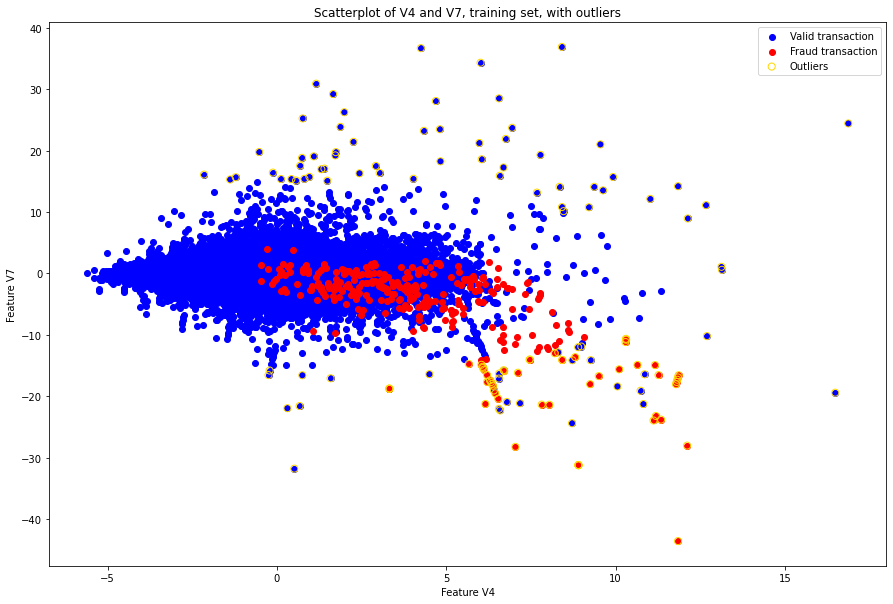

In [66]:
plt.figure(figsize=(15, 10))

plt.scatter(X_train_scatter.loc[X_train_scatter['Class'] == 0]['V4'],
            X_train_scatter.loc[X_train_scatter['Class'] == 0]['V7'],
            color = 'blue', label = 'Valid transaction')

plt.scatter(X_train_scatter.loc[X_train_scatter['Class'] == 1]['V4'],
            X_train_scatter.loc[X_train_scatter['Class'] == 1]['V7'],
            color = 'red', label = 'Fraud transaction')

outliers = np.nonzero(p_gm_4_7_train < best_thres_4_7)[0]
plt.scatter(X_train_scatter.iloc[outliers, 3], X_train_scatter.iloc[outliers, 6], marker="o", facecolor= "none",
            label = 'Outliers', edgecolor="gold", s=50)
plt.xlabel('Feature V4')
plt.ylabel('Feature V7')
plt.legend()
plt.title('Scatterplot of V4 and V7, training set, with outliers')
plt.show()

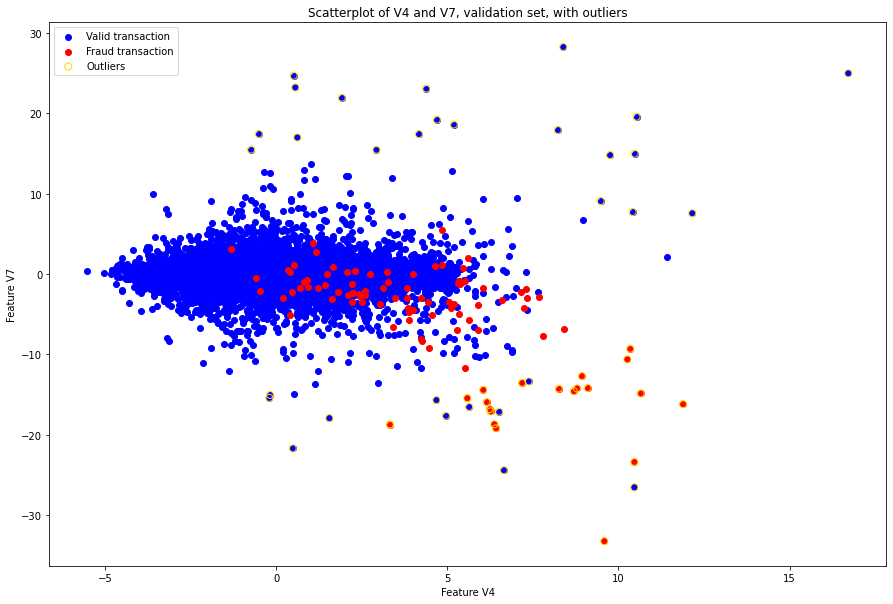

In [67]:
plt.figure(figsize=(15, 10))

plt.scatter(X_val_scatter.loc[X_val_scatter['Class'] == 0]['V4'],
            X_val_scatter.loc[X_val_scatter['Class'] == 0]['V7'],
            color = 'blue', label = 'Valid transaction')

plt.scatter(X_val_scatter.loc[X_val_scatter['Class'] == 1]['V4'],
            X_val_scatter.loc[X_val_scatter['Class'] == 1]['V7'],
            color = 'red', label = 'Fraud transaction')

outliers = np.nonzero(p_gm_4_7_val < best_thres_4_7)[0]
plt.scatter(X_val_scatter.iloc[outliers, 3], X_val_scatter.iloc[outliers, 6], marker="o", facecolor= "none",
            label = 'Outliers', edgecolor="gold", s=50)
plt.xlabel('Feature V4')
plt.ylabel('Feature V7')
plt.legend()
plt.title('Scatterplot of V4 and V7, validation set, with outliers')
plt.show()

### b.

#### 1.
I will choose V1, V4 and V7 as they have high AUC scores on validation set. 

#### 2.

In [68]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='b', marker='x', label='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o', label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(10, angle)
  plt.show()

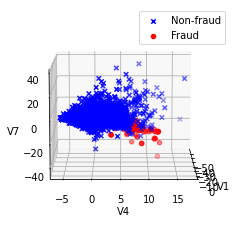

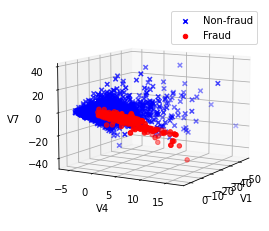

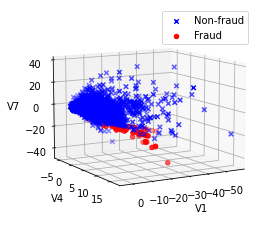

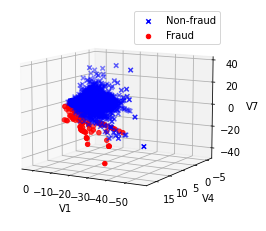

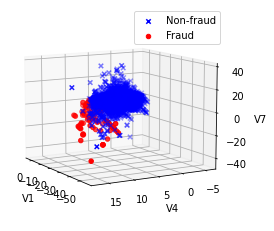

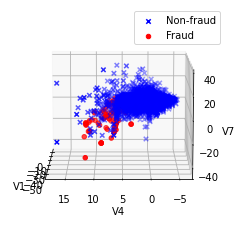

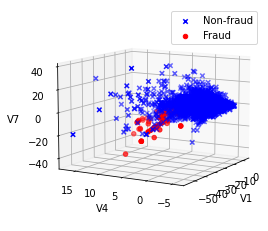

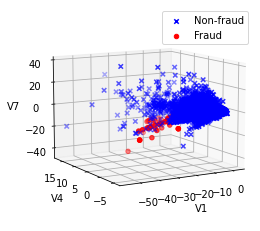

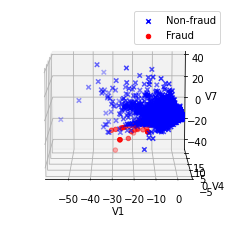

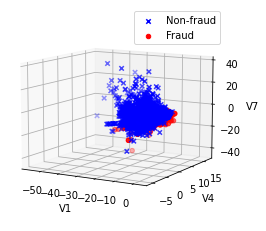

In [69]:
for i in [0, 30, 60, 120, 150, 180, 210, 240, 270, 300]:
  plot_3d(X_train, y_train, f1="V1", f2="V4", f3="V7", angle=i)

Based on the 3D plots, I think 2 number of Gaussian components would be good to fit the data. It seems that there is a major cluster, which can be fit into a Gaussian; and some random points that have no pattern, which could be fit into another Gaussian.

In [70]:
df_1_4_7_train = pd.concat([X_train['V1'], X_train['V4'], X_train['V7']], axis = 1)
df_1_4_7_val = pd.concat([X_val['V1'], X_val['V4'], X_val['V7']], axis = 1)

In [71]:
model_1_4_7_train = gm_2cpnt.fit(df_1_4_7_train)
p_gm_1_4_7_train = model_1_4_7_train.score_samples(df_1_4_7_train)
auc_score_1_4_7_train = roc_auc_score(y_train, 1-p_gm_1_4_7_train)

In [72]:
model_1_4_7_val = gm_2cpnt.fit(df_1_4_7_val)
p_gm_1_4_7_val = model_1_4_7_val.score_samples(df_1_4_7_val)
auc_score_1_4_7_val = roc_auc_score(y_val, 1-p_gm_1_4_7_val)

In [73]:
print('The AUC on training set is:', auc_score_1_4_7_train, '\nThe AUC on validation set is:', auc_score_1_4_7_val)

The AUC on training set is: 0.9212226978014054 
The AUC on validation set is: 0.9255588200809693


#### 3.

Text(0.5, 1.0, 'Histogram of log likelihood for each sample for feature V1, V4 and V7')

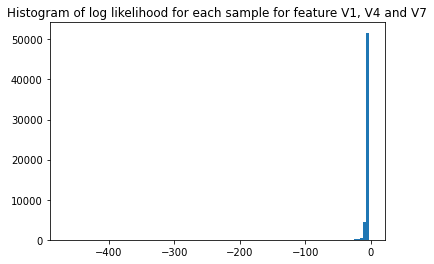

In [74]:
plt.hist(p_gm_1_4_7_val, bins = 100)
plt.title('Histogram of log likelihood for each sample for feature V1, V4 and V7')

In [75]:
min(p_gm_1_4_7_val)

-467.46133979634004

In [76]:
# I will first tune thresholds between -400 and -10 to determine the best threshold.

y_pred = [0] * len(y_val)
y_pred_1_4_7 = y_pred[:]
f1_score_V1_V4_V7 = []

def f1_V1_V4_V7(threshold: float):
  for i in range(len(p_gm_1_4_7_val)):
    if p_gm_1_4_7_val[i] <= threshold:
      y_pred_1_4_7[i] = 1
  return f1_score(y_val, y_pred_1_4_7)

for i in np.linspace(min(p_gm_1_4_7_val), -10, 200):
  f1_score_V1_V4_V7.append(f1_V1_V4_V7(i))
max(f1_score_V1_V4_V7)

0.21468926553672316

In [77]:
# Then I will narrow down the range of maximum F1-score, by looking at the results of f1_score_V14.
f1_score_V1_V4_V7

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.019047619047619046,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018867924528301886,
 0.018691588785046728,


In [78]:
# It seems that the best F1-score is at somewhere between -60 and -30, so I will try between this range to find it. 
y_pred_1_4_7 = y_pred[:]
f1_score_V1_V4_V7 = []
for i in np.linspace(-60, -30, 500):
  f1_score_V1_V4_V7.append(f1_V1_V4_V7(i))

best_thres_1_4_7 = np.linspace(-60, -30, 500)[np.argmax(f1_score_V1_V4_V7)]
print('The maximum F1-score for model based on V1, V4 and V7 is:', max(f1_score_V1_V4_V7), 
      ', with a threshold of', best_thres_1_4_7)

The maximum F1-score for model based on V1, V4 and V7 is: 0.21782178217821785 , with a threshold of -45.390781563126254


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

#### 1.

In [79]:
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)

In [80]:
X_train_non_frad = X_train.loc[df["Class"] == 0]

G1_V4_non_frad_train = gm1.fit(X_train_non_frad.iloc[:, 3:4])

#### 2.

In [81]:
X_train_frad = X_train.loc[df["Class"] == 1]

G2_V4_frad_train = gm2.fit(X_train_frad.iloc[:, 3:4])

#### 3.

In [82]:
S1 = G1_V4_non_frad_train.score_samples(X_val.iloc[:, 3:4])
S2 = G2_V4_frad_train.score_samples(X_val.iloc[:, 3:4])

#### 4.

In [83]:
# I first try 200 different c values from 0 to 10, find the approximate c location that approximately maximizes F1 score.
y_pred_S1_S2 = [0] * len(y_val)
f1_score_S1_S2 = []

def f1_S1_S2(c: float):
  y_pred_S1_S2 = [0] * len(y_val)
  f1_score_S1_S2 = []
  for i in range(len(y_pred_S1_S2)):
    if S1[i] < c * S2[i]:
      y_pred_S1_S2[i] = 1
  return f1_score(y_val, y_pred_S1_S2)

for c in np.linspace(0, 10, 200):
  f1_score_S1_S2.append(f1_S1_S2(c))

print(max(f1_score_S1_S2), np.linspace(0, 10, 200)[np.argmax(f1_score_S1_S2)])

0.3796296296296296 4.170854271356784


In [84]:
# It seems that the max c is at around 4.17, so I will try values from 4 to 4.5 to find it.
y_pred_S1_S2 = [0] * len(y_val)
f1_score_S1_S2 = []
for c in np.linspace(4, 4.5, 500):
  f1_score_S1_S2.append(f1_S1_S2(c))

best_c = np.linspace(4, 4.5, 500)[np.argmax(f1_score_S1_S2)]
print('The maximum F1-score for this two Gaussian model, based on V4, is:', max(f1_score_S1_S2), 
      ', with a threshold of', best_c)

The maximum F1-score for this two Gaussian model, based on V4, is: 0.383177570093458 , with a threshold of 4.188376753507014


#### 5.

In [85]:
G1_non_frad_train = []
G2_frad_train = []

precision_train = []
recall_train = []

best_f1_list_train = []
best_c_list_train = []

for i in range(X_train_non_frad.shape[1]):
  G1_non_frad_train.append(gm1.fit(X_train_non_frad.iloc[:, i:i+1]))
  G2_frad_train.append(gm2.fit(X_train_frad.iloc[:, i:i+1]))
  S1 = G1_non_frad_train[i].score_samples(X_train.iloc[:, i:i+1])
  S2 = G2_frad_train[i].score_samples(X_train.iloc[:, i:i+1])
  
  f1_list = []
  c_list = []
  for c in np.linspace(0, 10, 300):
    f1_list.append(f1_score(y_train, S1 < c * S2))
    c_list.append(c)
    best_f1 = max(f1_list)
    best_c = np.linspace(0, 10, 300)[np.argmax(f1_list)]
  
  best_f1_list_train.append(best_f1)
  best_c_list_train.append(best_c)

  precision_train.append(precision_score(y_train, S1 < best_c * S2))
  recall_train.append(recall_score(y_train, S1 < best_c * S2))

In [86]:
table4_train = pd.DataFrame(data = np.array([best_f1_list_train, best_c_list_train, precision_train, recall_train]))
table4_train = table4_train.T
table4_train.columns = index = ['F1 score - training set', 'Threshold - training set', 'Precision - training set', 'Recall - training set']
table4_train.index = ['V' + str(i) for i in range(1, 29)]
table4_train

,F1 score - training set,Threshold - training set,Precision - training set,Recall - training set
V1,0.128244,6.588629,0.126126,0.130435
V2,0.158120,4.849498,0.253425,0.114907
V3,0.275591,7.993311,0.376344,0.217391
V4,0.356303,4.615385,0.388278,0.329193
V5,0.170132,8.026756,0.217391,0.139752
V6,0.106725,1.839465,0.069790,0.226708
V7,0.251656,9.765886,0.269504,0.236025
V8,0.078195,9.732441,0.075802,0.080745
V9,0.408989,3.344482,0.739837,0.282609
V10,0.422414,8.060201,0.690141,0.304348


In [87]:
print('For training set, the feature with the highest F1 score is feature V', np.argmax(best_f1_list_train) + 1,
      ', with the highest F1 score of:', max(best_f1_list_train), ',\nthreshold c of',
      best_c_list_train[np.argmax(best_f1_list_train)], ', precision of', precision_train[np.argmax(best_f1_list_train)],
      ', and recall of', recall_train[np.argmax(best_f1_list_train)])

For training set, the feature with the highest F1 score is feature V 12 , with the highest F1 score of: 0.6830985915492956 ,
threshold c of 4.782608695652174 , precision of 0.7886178861788617 , and recall of 0.6024844720496895


In [88]:
G1_non_frad_train = []
G2_frad_train = []

precision_val = []
recall_val = []

best_f1_list_val = []
best_c_list_val = []

for i in range(X_val_non_frad.shape[1]):
  G1_non_frad_train.append(gm1.fit(X_train_non_frad.iloc[:, i:i+1]))
  G2_frad_train.append(gm2.fit(X_train_frad.iloc[:, i:i+1]))
  S1 = G1_non_frad_train[i].score_samples(X_val.iloc[:, i:i+1])
  S2 = G2_frad_train[i].score_samples(X_val.iloc[:, i:i+1])
  
  f1_list = []
  c_list = []
  for c in np.linspace(0, 10, 300):
    f1_list.append(f1_score(y_val, S1 < c * S2))
    c_list.append(c)
    best_f1 = max(f1_list)
    best_c = np.linspace(0, 10, 300)[np.argmax(f1_list)]
  
  best_f1_list_val.append(best_f1)
  best_c_list_val.append(best_c)

  precision_val.append(precision_score(y_val, S1 < best_c * S2))
  recall_val.append(recall_score(y_val, S1 < best_c * S2))

In [89]:
table4_val = pd.DataFrame(data = np.array([best_f1_list_val, best_c_list_val, precision_val, recall_val]))
table4_val = table4_val.T
table4_val.columns = index = ['F1 score - validation set', 'Threshold - validation set', 'Precision - validation set', 'Recall - validation set']
table4_val.index = ['V' + str(i) for i in range(1, 29)]
table4_val

,F1 score - validation set,Threshold - validation set,Precision - validation set,Recall - validation set
V1,0.152381,6.588629,0.148148,0.156863
V2,0.175439,5.852843,0.833333,0.098039
V3,0.312139,7.558528,0.380282,0.264706
V4,0.381395,4.180602,0.362832,0.401961
V5,0.193939,8.294314,0.253968,0.156863
V6,0.120092,1.839465,0.078550,0.254902
V7,0.237113,10.000000,0.250000,0.225490
V8,0.105263,6.956522,0.081967,0.147059
V9,0.448980,3.377926,0.733333,0.323529
V10,0.397590,6.789298,0.515625,0.323529


In [90]:
print('For validation set, the feature with the highest F1 score is feature V', np.argmax(best_f1_list_val) + 1, 
      ', with the corresponding F1 score of', max(best_f1_list_val), ', threshold c of',
      best_c_list_val[np.argmax(best_f1_list_val)], ',\nprecision of', precision_val[np.argmax(best_f1_list_val)],
      ', and recall of', recall_val[np.argmax(best_f1_list_val)])

For validation set, the feature with the highest F1 score is feature V 17 , with the corresponding F1 score of 0.6701570680628272 , threshold c of 5.88628762541806 ,
precision of 0.7191011235955056 , and recall of 0.6274509803921569


#### 6.

Since there are two Gaussian models, it would be meaningless for us to compute AUC. We have seperated two Gaussian models, one with only positive response, one with only negative response. Therefore, when we calculate AUC, we are comparing our predictions to only positive or negative response, so AUC would be inaccurate.

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

I will try one or two Gaussian(s), and components from 1 to 10, on feature V12, V14, and V17. The models are as follows.
1. one Gaussian with 1 component on feature V14.
2. one Gaussian with 1 component on feature V12, V14.
3. one Gaussian with 1 component on feature V14, V17.
4. one Gaussian with 2 components on feature V12, V14, V17.
5. one Gaussian with 3 components on feature V12, V14, V17.
6. two Gaussians with 1 component on valid transactions and 1 components on fraud transactions, on feature V12.
7. two Gaussians with 1 component on valid transactions and 2 components on fraud transactions, on feature V14.
8. two Gaussians with 1 component on valid transactions and 3 components on fraud transactions, on feature V12, V14.
9. two Gaussians with 1 component on valid transactions and 4 components on fraud transactions, on feature V14, V17.
10. two Gaussians with 1 component on valid transactions and 5 components on fraud transactions, on feature V12, V14, V17.
11. two Gaussians with 1 component on valid transactions and 6 components on fraud transactions, on feature V12, V14, V17.
12. two Gaussians with 1 component on valid transactions and 7 components on fraud transactions, on feature V12, V14, V17.
13. two Gaussians with 1 component on valid transactions and 8 components on fraud transactions, on feature V12, V14, V17.
14. two Gaussians with 1 component on valid transactions and 9 components on fraud transactions, on feature V12, V14, V17.
15. two Gaussians with 1 component on valid transactions and 10 components on fraud transactions, on feature V12, V14, V17.


In [91]:
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm3 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm4 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0)
gm5 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0)
gm6a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm6b = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm7a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm7b = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0)
gm8a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm8b = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0)
gm9a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm9b = GaussianMixture(n_components = 4,
                    covariance_type = 'full', random_state=0)
gm10a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm10b = GaussianMixture(n_components = 5,
                    covariance_type = 'full', random_state=0)
gm11a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm11b = GaussianMixture(n_components = 6,
                    covariance_type = 'full', random_state=0)
gm12a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm12b = GaussianMixture(n_components = 7,
                    covariance_type = 'full', random_state=0)
gm13a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm13b = GaussianMixture(n_components = 8,
                    covariance_type = 'full', random_state=0)
gm14a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm14b = GaussianMixture(n_components = 9,
                    covariance_type = 'full', random_state=0)
gm15a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0)
gm15b = GaussianMixture(n_components = 10,
                    covariance_type = 'full', random_state=0)

In [92]:
def f1_train(threshold: float, p_gm_train):
  y_pred = [0] * len(y_train)
  for i in range(len(p_gm_train)):
    if p_gm_train[i] <= threshold:
      y_pred[i] = 1
  return f1_score(y_train, y_pred)

In [93]:
def f1_val(threshold: float, p_gm_val):
  y_pred = [0] * len(y_val)
  for i in range(len(p_gm_val)):
    if p_gm_val[i] <= threshold:
      y_pred[i] = 1
  return f1_score(y_val, y_pred)

In [94]:
p_gm_1_train = gm1.fit(X_train.iloc[:, 13:14]).score_samples(X_train.iloc[:, 13:14])
p_gm_1_val = gm1.fit(X_train.iloc[:, 13:14]).score_samples(X_val.iloc[:, 13:14])

f1_score_1_train = []
f1_score_1_val = []

for i in np.linspace(min(p_gm_1_train), max(p_gm_1_train), 100):
  f1_score_1_train.append(f1_train(i, p_gm_1_train))
for i in np.linspace(min(p_gm_1_val), max(p_gm_1_val), 100):
  f1_score_1_val.append(f1_val(i, p_gm_1_val))

best_thres_1_train = np.linspace(min(p_gm_1_train), max(p_gm_1_train), 100)[np.argmax(f1_score_1_train)]
best_thres_1_val = np.linspace(min(p_gm_1_val), max(p_gm_1_val), 100)[np.argmax(f1_score_1_val)]

print('The maximum F1-score for model 1 on training set is:', max(f1_score_1_train), 
      ', with a threshold of', best_thres_1_train, '\nThe AUC score is:', roc_auc_score(y_train, 1-p_gm_1_train),
      'the recall is', recall_score(y_train, p_gm_1_train < best_thres_1_train), 'the precision is', precision_score(y_train, p_gm_1_train < best_thres_1_train))

print('The maximum F1-score for model 1 on validation set is:', max(f1_score_1_val), 
      ', with a threshold of', best_thres_1_val, '\nThe AUC score is:', roc_auc_score(y_val, 1-p_gm_1_val),
      'the recall is', recall_score(y_val, p_gm_1_val < best_thres_1_val), 'the precision is', precision_score(y_val, p_gm_1_val < best_thres_1_val))

The maximum F1-score for model 1 on training set is: 0.6049586776859505 , with a threshold of -20.33993627524714 
The AUC score is: 0.9480139640555438 the recall is 0.5683229813664596 the precision is 0.6466431095406361
The maximum F1-score for model 1 on validation set is: 0.6108374384236452 , with a threshold of -17.787871945537773 
The AUC score is: 0.9550654169511631 the recall is 0.6078431372549019 the precision is 0.6138613861386139


In [95]:
df_12_14_train = pd.concat([X_train.iloc[:, 11:12], X_train.iloc[:, 13:14]], axis = 1)
df_12_14_val = pd.concat([X_val.iloc[:, 11:12], X_val.iloc[:, 13:14]], axis = 1)
df_14_17_train = pd.concat([X_train.iloc[:, 13:14], X_train.iloc[:, 16:17]], axis = 1)
df_14_17_val = pd.concat([X_val.iloc[:, 13:14], X_val.iloc[:, 16:17]], axis = 1)
df_12_14_17_train = pd.concat([X_train.iloc[:, 11:12], X_train.iloc[:, 13:14], X_train.iloc[:, 16:17]], axis = 1)
df_12_14_17_val = pd.concat([X_val.iloc[:, 11:12], X_val.iloc[:, 13:14], X_val.iloc[:, 16:17]], axis = 1)

In [96]:
p_gm_2_train = gm2.fit(df_12_14_train).score_samples(df_12_14_train)
p_gm_2_val = gm2.fit(df_12_14_val).score_samples(df_12_14_val)

f1_score_2_train = []
f1_score_2_val = []

for i in np.linspace(min(p_gm_2_train), max(p_gm_2_train), 100):
  f1_score_2_train.append(f1_train(i, p_gm_2_train))
for i in np.linspace(min(p_gm_2_val), max(p_gm_2_val), 100):
  f1_score_2_val.append(f1_val(i, p_gm_2_val))

best_thres_2_train = np.linspace(min(p_gm_2_train), max(p_gm_2_train), 100)[np.argmax(f1_score_2_train)]
best_thres_2_val = np.linspace(min(p_gm_2_val), max(p_gm_2_val), 100)[np.argmax(f1_score_2_val)]

print('The maximum F1-score for model 2 on training set is:', max(f1_score_2_train), 
      ', with a threshold of', best_thres_2_train, '\nThe AUC score is:', roc_auc_score(y_train, 1-p_gm_2_train),
      'the recall is', recall_score(y_train, p_gm_2_train < best_thres_2_train), 'the precision is', precision_score(y_train, p_gm_2_train < best_thres_2_train))

print('The maximum F1-score for model 2 on validation set is:', max(f1_score_2_val), 
      ', with a threshold of', best_thres_2_val, '\nThe AUC score is:', roc_auc_score(y_val, 1-p_gm_2_val),
      'the recall is', recall_score(y_val, p_gm_2_val < best_thres_2_val), 'the precision is', precision_score(y_val, p_gm_2_val < best_thres_2_val))

The maximum F1-score for model 2 on training set is: 0.6602254428341385 , with a threshold of -26.370617712030594 
The AUC score is: 0.9525893406037805 the recall is 0.6366459627329193 the precision is 0.68561872909699
The maximum F1-score for model 2 on validation set is: 0.67816091954023 , with a threshold of -36.64809413491042 
The AUC score is: 0.9538832909174926 the recall is 0.5784313725490197 the precision is 0.8194444444444444


In [97]:
p_gm_3_train = gm3.fit(df_14_17_train).score_samples(df_14_17_train)
p_gm_3_val = gm3.fit(df_14_17_val).score_samples(df_14_17_val)

f1_score_3_train = []
f1_score_3_val = []

for i in np.linspace(min(p_gm_3_train), max(p_gm_3_train), 100):
  f1_score_3_train.append(f1_train(i, p_gm_3_train))
for i in np.linspace(min(p_gm_3_val), max(p_gm_3_val), 100):
  f1_score_3_val.append(f1_val(i, p_gm_3_val))

best_thres_3_train = np.linspace(min(p_gm_3_train), max(p_gm_3_train), 100)[np.argmax(f1_score_3_train)]
best_thres_3_val = np.linspace(min(p_gm_3_val), max(p_gm_3_val), 100)[np.argmax(f1_score_3_val)]

print('The maximum F1-score for model 3 on training set is:', max(f1_score_3_train), 
      ', with a threshold of', best_thres_3_train, '\nThe AUC score is:', roc_auc_score(y_train, 1-p_gm_3_train),
      'the recall is', recall_score(y_train, p_gm_3_train < best_thres_3_train), 'the precision is', precision_score(y_train, p_gm_3_train < best_thres_3_train))

print('The maximum F1-score for model 3 on validation set is:', max(f1_score_3_val), 
      ', with a threshold of', best_thres_3_val, '\nThe AUC score is:', roc_auc_score(y_val, 1-p_gm_3_val),
      'the recall is', recall_score(y_val, p_gm_3_val < best_thres_3_val), 'the precision is', precision_score(y_val, p_gm_3_val < best_thres_3_val))

The maximum F1-score for model 3 on training set is: 0.6804451510333863 , with a threshold of -31.780903178412927 
The AUC score is: 0.9573976015361967 the recall is 0.6645962732919255 the precision is 0.6970684039087948
The maximum F1-score for model 3 on validation set is: 0.6881720430107526 , with a threshold of -37.958719181961555 
The AUC score is: 0.9618219500251737 the recall is 0.6274509803921569 the precision is 0.7619047619047619


In [98]:
p_gm_4_train = gm4.fit(df_12_14_17_train).score_samples(df_12_14_17_train)
p_gm_4_val = gm4.fit(df_12_14_17_val).score_samples(df_12_14_17_val)

f1_score_4_train = []
f1_score_4_val = []

for i in np.linspace(min(p_gm_4_train), max(p_gm_4_train), 100):
  f1_score_4_train.append(f1_train(i, p_gm_4_train))
for i in np.linspace(min(p_gm_4_val), max(p_gm_4_val), 100):
  f1_score_4_val.append(f1_val(i, p_gm_4_val))

best_thres_4_train = np.linspace(min(p_gm_4_train), max(p_gm_4_train), 100)[np.argmax(f1_score_4_train)]
best_thres_4_val = np.linspace(min(p_gm_4_val), max(p_gm_4_val), 100)[np.argmax(f1_score_4_val)]

print('The maximum F1-score for model 4 on training set is:', max(f1_score_4_train), 
      ', with a threshold of', best_thres_4_train, '\nThe AUC score is:', roc_auc_score(y_train, 1-p_gm_4_train),
      'the recall is', recall_score(y_train, p_gm_4_train < best_thres_4_train), 'the precision is', precision_score(y_train, p_gm_4_train < best_thres_4_train))

print('The maximum F1-score for model 4 on validation set is:', max(f1_score_4_val), 
      ', with a threshold of', best_thres_4_val, '\nThe AUC score is:', roc_auc_score(y_val, 1-p_gm_4_val),
      'the recall is', recall_score(y_val, p_gm_4_val < best_thres_4_val), 'the precision is', precision_score(y_val, p_gm_4_val < best_thres_4_val))

The maximum F1-score for model 4 on training set is: 0.660436137071651 , with a threshold of -14.782376554036176 
The AUC score is: 0.9591039022973209 the recall is 0.6583850931677019 the precision is 0.6625
The maximum F1-score for model 4 on validation set is: 0.6854460093896714 , with a threshold of -14.471119772912601 
The AUC score is: 0.9573236294165925 the recall is 0.7156862745098039 the precision is 0.6576576576576577


In [99]:
p_gm_5_train = gm5.fit(df_12_14_17_train).score_samples(df_12_14_17_train)
p_gm_5_val = gm5.fit(df_12_14_17_val).score_samples(df_12_14_17_val)

f1_score_5_train = []
f1_score_5_val = []

for i in np.linspace(min(p_gm_5_train), max(p_gm_5_train), 100):
  f1_score_5_train.append(f1_train(i, p_gm_5_train))
for i in np.linspace(min(p_gm_5_val), max(p_gm_5_val), 100):
  f1_score_5_val.append(f1_val(i, p_gm_5_val))

best_thres_5_train = np.linspace(min(p_gm_5_train), max(p_gm_5_train), 100)[np.argmax(f1_score_5_train)]
best_thres_5_val = np.linspace(min(p_gm_5_val), max(p_gm_5_val), 100)[np.argmax(f1_score_5_val)]

print('The maximum F1-score for model 5 on training set is:', max(f1_score_5_train), 
      ', with a threshold of', best_thres_5_train, '\nThe AUC score is:', roc_auc_score(y_train, 1-p_gm_5_train),
      'the recall is', recall_score(y_train, p_gm_5_train < best_thres_5_train), 'the precision is', precision_score(y_train, p_gm_5_train < best_thres_5_train))

print('The maximum F1-score for model 5 on validation set is:', max(f1_score_5_val), 
      ', with a threshold of', best_thres_5_val, '\nThe AUC score is:', roc_auc_score(y_val, 1-p_gm_5_val),
      'the recall is', recall_score(y_val, p_gm_5_val < best_thres_5_val), 'the precision is', precision_score(y_val, p_gm_5_val < best_thres_5_val))

The maximum F1-score for model 5 on training set is: 0.5896551724137931 , with a threshold of -19.79228188816363 
The AUC score is: 0.9565215206647837 the recall is 0.531055900621118 the precision is 0.6627906976744186
The maximum F1-score for model 5 on validation set is: 0.625 , with a threshold of -17.79480477807769 
The AUC score is: 0.9534936169332312 the recall is 0.5882352941176471 the precision is 0.6666666666666666


In [100]:
S1_train = gm6a.fit(X_train_non_frad.iloc[:, 11:12]).score_samples(X_train.iloc[:, 11:12])
S2_train = gm6b.fit(X_train_frad.iloc[:, 11:12]).score_samples(X_train.iloc[:, 11:12])
S1_val = gm6a.fit(X_train_non_frad.iloc[:, 11:12]).score_samples(X_val.iloc[:, 11:12])
S2_val = gm6b.fit(X_train_frad.iloc[:, 11:12]).score_samples(X_val.iloc[:, 11:12])

f1_score_list_train = []
f1_score_list_val = []
c_list_train = []
c_list_val = []

for c in np.linspace(0, 10, 100):
  f1_score_list_train.append(f1_score(y_train, S1_train < c * S2_train))
  c_list_train.append(c)
for c in np.linspace(0, 10, 100):
  f1_score_list_val.append(f1_score(y_val, S1_val < c * S2_val))
  c_list_val.append(c)

best_f1_6_train = max(f1_score_list_train)
best_f1_6_val = max(f1_score_list_val)
best_c_6_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_6_val = c_list_val[np.argmax(f1_score_list_val)]
precision_6_train = precision_score(y_train, S1_train < best_c_6_train * S2_train)
precision_6_val = precision_score(y_val, S1_val < best_c_6_val * S2_val)
recall_6_train = recall_score(y_train, S1_train < best_c_6_train * S2_train)
recall_6_val = recall_score(y_val, S1_val < best_c_6_val * S2_val)

In [101]:
S1_train = gm7a.fit(X_train_non_frad.iloc[:, 13:14]).score_samples(X_train.iloc[:, 13:14])
S2_train = gm7b.fit(X_train_frad.iloc[:, 13:14]).score_samples(X_train.iloc[:, 13:14])
S1_val = gm7a.fit(X_train_non_frad.iloc[:, 13:14]).score_samples(X_val.iloc[:, 13:14])
S2_val = gm7b.fit(X_train_frad.iloc[:, 13:14]).score_samples(X_val.iloc[:, 13:14])

f1_score_list_train = []
f1_score_list_val = []
c_list_train = []
c_list_val = []

for c in np.linspace(0, 10, 100):
  f1_score_list_train.append(f1_score(y_train, S1_train < c * S2_train))
  c_list_train.append(c)
for c in np.linspace(0, 10, 100):
  f1_score_list_val.append(f1_score(y_val, S1_val < c * S2_val))
  c_list_val.append(c)

best_f1_7_train = max(f1_score_list_train)
best_f1_7_val = max(f1_score_list_val)
best_c_7_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_7_val = c_list_val[np.argmax(f1_score_list_val)]
precision_7_train = precision_score(y_train, S1_train < best_c_7_train * S2_train)
precision_7_val = precision_score(y_val, S1_val < best_c_7_val * S2_val)
recall_7_train = recall_score(y_train, S1_train < best_c_7_train * S2_train)
recall_7_val = recall_score(y_val, S1_val < best_c_7_val * S2_val)

In [102]:
df_non_frad_12_14_train = pd.concat([X_train_non_frad.iloc[:, 11:12], X_train_non_frad.iloc[:, 13:14]], axis = 1)
df_non_frad_14_17_train = pd.concat([X_train_non_frad.iloc[:, 13:14], X_train_non_frad.iloc[:, 16:17]], axis = 1)
df_non_frad_12_14_17_train = pd.concat([X_train_non_frad.iloc[:, 11:12], X_train_non_frad.iloc[:, 13:14], X_train_non_frad.iloc[:, 16:17]], axis = 1)

df_non_frad_12_14_val = pd.concat([X_val_non_frad.iloc[:, 11:12], X_val_non_frad.iloc[:, 13:14]], axis = 1)
df_non_frad_14_17_val = pd.concat([X_val_non_frad.iloc[:, 13:14], X_val_non_frad.iloc[:, 16:17]], axis = 1)
df_non_frad_12_14_17_val = pd.concat([X_val_non_frad.iloc[:, 11:12], X_val_non_frad.iloc[:, 13:14], X_val_non_frad.iloc[:, 16:17]], axis = 1)

df_frad_12_14_train = pd.concat([X_train_frad.iloc[:, 11:12], X_train_frad.iloc[:, 13:14]], axis = 1)
df_frad_14_17_train = pd.concat([X_train_frad.iloc[:, 13:14], X_train_frad.iloc[:, 16:17]], axis = 1)
df_frad_12_14_17_train = pd.concat([X_train_frad.iloc[:, 11:12], X_train_frad.iloc[:, 13:14], X_train_frad.iloc[:, 16:17]], axis = 1)

In [103]:
S1_train = gm8a.fit(df_non_frad_12_14_train).score_samples(df_12_14_train)
S2_train = gm8b.fit(df_frad_12_14_train).score_samples(df_12_14_train)
S1_val = gm8a.fit(df_non_frad_12_14_train).score_samples(df_12_14_val)
S2_val = gm8b.fit(df_frad_12_14_train).score_samples(df_12_14_val)

f1_score_list_train = []
f1_score_list_val = []
c_list_train = []
c_list_val = []

for c in np.linspace(0, 10, 100):
  f1_score_list_train.append(f1_score(y_train, S1_train < c * S2_train))
  c_list_train.append(c)
for c in np.linspace(0, 10, 100):
  f1_score_list_val.append(f1_score(y_val, S1_val < c * S2_val))
  c_list_val.append(c)

best_c_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_val = c_list_val[np.argmax(f1_score_list_val)]

best_f1_8_train = max(f1_score_list_train)
best_f1_8_val = max(f1_score_list_val)
best_c_8_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_8_val = c_list_val[np.argmax(f1_score_list_val)]
precision_8_train = precision_score(y_train, S1_train < best_c_8_train * S2_train)
precision_8_val = precision_score(y_val, S1_val < best_c_8_val * S2_val)
recall_8_train = recall_score(y_train, S1_train < best_c_8_train * S2_train)
recall_8_val = recall_score(y_val, S1_val < best_c_8_val * S2_val)

In [104]:
S1_train = gm9a.fit(df_non_frad_14_17_train).score_samples(df_14_17_train)
S2_train = gm9b.fit(df_frad_14_17_train).score_samples(df_14_17_train)
S1_val = gm9a.fit(df_non_frad_14_17_train).score_samples(df_14_17_val)
S2_val = gm9b.fit(df_frad_14_17_train).score_samples(df_14_17_val)

f1_score_list_train = []
f1_score_list_val = []
c_list_train = []
c_list_val = []

for c in np.linspace(0, 10, 100):
  f1_score_list_train.append(f1_score(y_train, S1_train < c * S2_train))
  c_list_train.append(c)
for c in np.linspace(0, 10, 100):
  f1_score_list_val.append(f1_score(y_val, S1_val < c * S2_val))
  c_list_val.append(c)

best_c_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_val = c_list_val[np.argmax(f1_score_list_val)]

best_f1_9_train = max(f1_score_list_train)
best_f1_9_val = max(f1_score_list_val)
best_c_9_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_9_val = c_list_val[np.argmax(f1_score_list_val)]
precision_9_train = precision_score(y_train, S1_train < best_c_9_train * S2_train)
precision_9_val = precision_score(y_val, S1_val < best_c_9_val * S2_val)
recall_9_train = recall_score(y_train, S1_train < best_c_9_train * S2_train)
recall_9_val = recall_score(y_val, S1_val < best_c_9_val * S2_val)

In [105]:
S1_train = gm10a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_train)
S2_train = gm10b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_train)
S1_val = gm10a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_val)
S2_val = gm10b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_val)

f1_score_list_train = []
f1_score_list_val = []
c_list_train = []
c_list_val = []

for c in np.linspace(0, 10, 100):
  f1_score_list_train.append(f1_score(y_train, S1_train < c * S2_train))
  c_list_train.append(c)
for c in np.linspace(0, 10, 100):
  f1_score_list_val.append(f1_score(y_val, S1_val < c * S2_val))
  c_list_val.append(c)

best_f1_10_train = max(f1_score_list_train)
best_f1_10_val = max(f1_score_list_val)
best_c_10_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_10_val = c_list_val[np.argmax(f1_score_list_val)]
precision_10_train = precision_score(y_train, S1_train < best_c_10_train * S2_train)
precision_10_val = precision_score(y_val, S1_val < best_c_10_val * S2_val)
recall_10_train = recall_score(y_train, S1_train < best_c_10_train * S2_train)
recall_10_val = recall_score(y_val, S1_val < best_c_10_val * S2_val)

In [106]:
S1_train = gm11a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_train)
S2_train = gm11b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_train)
S1_val = gm11a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_val)
S2_val = gm11b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_val)

f1_score_list_train = []
f1_score_list_val = []
c_list_train = []
c_list_val = []

for c in np.linspace(0, 10, 200):
  f1_score_list_train.append(f1_score(y_train, S1_train < c * S2_train))
  c_list_train.append(c)
for c in np.linspace(0, 10, 200):
  f1_score_list_val.append(f1_score(y_val, S1_val < c * S2_val))
  c_list_val.append(c)

best_f1_11_train = max(f1_score_list_train)
best_f1_11_val = max(f1_score_list_val)
best_c_11_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_11_val = c_list_val[np.argmax(f1_score_list_val)]
precision_11_train = precision_score(y_train, S1_train < best_c_11_train * S2_train)
precision_11_val = precision_score(y_val, S1_val < best_c_11_val * S2_val)
recall_11_train = recall_score(y_train, S1_train < best_c_11_train * S2_train)
recall_11_val = recall_score(y_val, S1_val < best_c_11_val * S2_val)

In [107]:
S1_train = gm12a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_train)
S2_train = gm12b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_train)
S1_val = gm12a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_val)
S2_val = gm12b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_val)

f1_score_list_train = []
f1_score_list_val = []
c_list_train = []
c_list_val = []

for c in np.linspace(0, 10, 200):
  f1_score_list_train.append(f1_score(y_train, S1_train < c * S2_train))
  c_list_train.append(c)
for c in np.linspace(0, 10, 200):
  f1_score_list_val.append(f1_score(y_val, S1_val < c * S2_val))
  c_list_val.append(c)

best_c_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_val = c_list_val[np.argmax(f1_score_list_val)]

best_f1_12_train = max(f1_score_list_train)
best_f1_12_val = max(f1_score_list_val)
best_c_12_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_12_val = c_list_val[np.argmax(f1_score_list_val)]
precision_12_train = precision_score(y_train, S1_train < best_c_12_train * S2_train)
precision_12_val = precision_score(y_val, S1_val < best_c_12_val * S2_val)
recall_12_train = recall_score(y_train, S1_train < best_c_12_train * S2_train)
recall_12_val = recall_score(y_val, S1_val < best_c_12_val * S2_val)

In [108]:
S1_train = gm13a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_train)
S2_train = gm13b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_train)
S1_val = gm13a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_val)
S2_val = gm13b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_val)

f1_score_list_train = []
f1_score_list_val = []
c_list_train = []
c_list_val = []

for c in np.linspace(0, 10, 200):
  f1_score_list_train.append(f1_score(y_train, S1_train < c * S2_train))
  c_list_train.append(c)
for c in np.linspace(0, 10, 200):
  f1_score_list_val.append(f1_score(y_val, S1_val < c * S2_val))
  c_list_val.append(c)

best_c_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_val = c_list_val[np.argmax(f1_score_list_val)]

best_f1_13_train = max(f1_score_list_train)
best_f1_13_val = max(f1_score_list_val)
best_c_13_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_13_val = c_list_val[np.argmax(f1_score_list_val)]
precision_13_train = precision_score(y_train, S1_train < best_c_13_train * S2_train)
precision_13_val = precision_score(y_val, S1_val < best_c_13_val * S2_val)
recall_13_train = recall_score(y_train, S1_train < best_c_13_train * S2_train)
recall_13_val = recall_score(y_val, S1_val < best_c_13_val * S2_val)

In [109]:
S1_train = gm14a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_train)
S2_train = gm14b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_train)
S1_val = gm14a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_val)
S2_val = gm14b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_val)

f1_score_list_train = []
f1_score_list_val = []
c_list_train = []
c_list_val = []

for c in np.linspace(0, 10, 200):
  f1_score_list_train.append(f1_score(y_train, S1_train < c * S2_train))
  c_list_train.append(c)
for c in np.linspace(0, 10, 200):
  f1_score_list_val.append(f1_score(y_val, S1_val < c * S2_val))
  c_list_val.append(c)

best_c_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_val = c_list_val[np.argmax(f1_score_list_val)]

best_f1_14_train = max(f1_score_list_train)
best_f1_14_val = max(f1_score_list_val)
best_c_14_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_14_val = c_list_val[np.argmax(f1_score_list_val)]
precision_14_train = precision_score(y_train, S1_train < best_c_14_train * S2_train)
precision_14_val = precision_score(y_val, S1_val < best_c_14_val * S2_val)
recall_14_train = recall_score(y_train, S1_train < best_c_14_train * S2_train)
recall_14_val = recall_score(y_val, S1_val < best_c_14_val * S2_val)

In [110]:
S1_train = gm15a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_train)
S2_train = gm15b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_train)
S1_val = gm15a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_val)
S2_val = gm15b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_val)

f1_score_list_train = []
f1_score_list_val = []
c_list_train = []
c_list_val = []

for c in np.linspace(0, 10, 200):
  f1_score_list_train.append(f1_score(y_train, S1_train < c * S2_train))
  c_list_train.append(c)
for c in np.linspace(0, 10, 200):
  f1_score_list_val.append(f1_score(y_val, S1_val < c * S2_val))
  c_list_val.append(c)

best_c_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_val = c_list_val[np.argmax(f1_score_list_val)]

best_f1_15_train = max(f1_score_list_train)
best_f1_15_val = max(f1_score_list_val)
best_c_15_train = c_list_train[np.argmax(f1_score_list_train)]
best_c_15_val = c_list_val[np.argmax(f1_score_list_val)]
precision_15_train = precision_score(y_train, S1_train < best_c_15_train * S2_train)
precision_15_val = precision_score(y_val, S1_val < best_c_15_val * S2_val)
recall_15_train = recall_score(y_train, S1_train < best_c_15_train * S2_train)
recall_15_val = recall_score(y_val, S1_val < best_c_15_val * S2_val)

In [111]:
best_f1_train = [max(f1_score_1_train), max(f1_score_2_train), max(f1_score_3_train), max(f1_score_4_train), max(f1_score_5_train),
                 best_f1_6_train, best_f1_7_train, best_f1_8_train, best_f1_9_train, best_f1_10_train, best_f1_11_train,
                 best_f1_12_train, best_f1_13_train, best_f1_14_train, best_f1_15_train]
                 
best_f1_val = [max(f1_score_1_val), max(f1_score_2_val), max(f1_score_3_val), max(f1_score_4_val), max(f1_score_5_val),
               best_f1_6_val, best_f1_7_val, best_f1_8_val, best_f1_9_val, best_f1_10_val, best_f1_11_val,
               best_f1_12_val, best_f1_13_val, best_f1_14_val, best_f1_15_val]

In [112]:
best_c_list_train = [best_thres_1_train, best_thres_2_train, best_thres_3_train, best_thres_4_train, best_thres_5_train,
                     best_c_6_train, best_c_7_train, best_c_8_train, best_c_9_train, best_c_10_train, best_c_11_train,
                     best_c_12_train, best_c_13_train, best_c_14_train, best_c_15_train]

best_c_list_val = [best_thres_1_val, best_thres_2_val, best_thres_3_val, best_thres_4_val, best_thres_5_val,
                     best_c_6_val, best_c_7_val, best_c_8_val, best_c_9_val, best_c_10_val, best_c_11_val,
                     best_c_12_val, best_c_13_val, best_c_14_val, best_c_15_val]

In [113]:
roc_list_train = [roc_auc_score(y_train, 1-p_gm_1_train), roc_auc_score(y_train, 1-p_gm_2_train),
                  roc_auc_score(y_train, 1-p_gm_3_train), roc_auc_score(y_train, 1-p_gm_4_train),
                  roc_auc_score(y_train, 1-p_gm_5_train), '/', '/', '/', '/', '/', '/', '/', '/', '/', '/']

roc_list_val = [roc_auc_score(y_val, 1-p_gm_1_val), roc_auc_score(y_val, 1-p_gm_2_val),
                  roc_auc_score(y_val, 1-p_gm_3_val), roc_auc_score(y_val, 1-p_gm_4_val),
                  roc_auc_score(y_val, 1-p_gm_5_val), '/', '/', '/', '/', '/', '/', '/', '/', '/', '/']

In [114]:
precision_list_train = [precision_score(y_train, p_gm_1_train < best_thres_1_train),
                     precision_score(y_train, p_gm_2_train < best_thres_2_train),
                     precision_score(y_train, p_gm_3_train < best_thres_3_train),
                     precision_score(y_train, p_gm_4_train < best_thres_4_train),
                     precision_score(y_train, p_gm_5_train < best_thres_5_train),
                     precision_6_train,
                     precision_7_train,
                     precision_8_train,
                     precision_9_train,
                     precision_10_train,
                     precision_11_train,
                     precision_12_train,
                     precision_13_train,
                     precision_14_train,
                     precision_15_train]

precision_list_val = [precision_score(y_val, p_gm_1_val < best_thres_1_val),
                     precision_score(y_val, p_gm_2_val < best_thres_2_val),
                     precision_score(y_val, p_gm_3_val < best_thres_3_val),
                     precision_score(y_val, p_gm_4_val < best_thres_4_val),
                     precision_score(y_val, p_gm_5_val < best_thres_5_val),
                     precision_6_val,
                     precision_7_val,
                     precision_8_val,
                     precision_9_val,
                     precision_10_val,
                     precision_11_val,
                     precision_12_val,
                     precision_13_val,
                     precision_14_val,
                     precision_15_val]

In [115]:
recall_list_train = [recall_score(y_train, p_gm_1_train < best_thres_1_train),
                     recall_score(y_train, p_gm_2_train < best_thres_2_train),
                     recall_score(y_train, p_gm_3_train < best_thres_3_train),
                     recall_score(y_train, p_gm_4_train < best_thres_4_train),
                     recall_score(y_train, p_gm_5_train < best_thres_5_train),
                     recall_6_train,
                     recall_7_train,
                     recall_8_train,
                     recall_9_train,
                     recall_10_train,
                     recall_11_train,
                     recall_12_train,
                     recall_13_train,
                     recall_14_train,
                     recall_15_train]

recall_list_val = [recall_score(y_val, p_gm_1_val < best_thres_1_val),
                     recall_score(y_val, p_gm_2_val < best_thres_2_val),
                     recall_score(y_val, p_gm_3_val < best_thres_3_val),
                     recall_score(y_val, p_gm_4_val < best_thres_4_val),
                     recall_score(y_val, p_gm_5_val < best_thres_5_val),
                     recall_6_val,
                     recall_7_val,
                     recall_8_val,
                     recall_9_val,
                     recall_10_val,
                     recall_11_val,
                     recall_12_val,
                     recall_13_val,
                     recall_14_val,
                     recall_15_val]

In [116]:
table5_train = pd.DataFrame(data = np.array([best_f1_train, best_c_list_train, roc_list_train, precision_list_train, recall_list_train]))
table5_train = table5_train.T
table5_train.columns = ['F1 score - training set', 'Threshold - training set', 'ROC - training set', 'Precision - training set', 'Recall - training set']
table5_train.index = ['Model' + str(i) for i in range(1, 16)]
table5_train

,F1 score - training set,Threshold - training set,ROC - training set,Precision - training set,Recall - training set
Model1,0.6049586776859505,-20.33993627524714,0.9480139640555438,0.6466431095406361,0.5683229813664596
Model2,0.6602254428341385,-26.370617712030594,0.9525893406037805,0.68561872909699,0.6366459627329193
Model3,0.6804451510333863,-31.780903178412927,0.9573976015361967,0.6970684039087948,0.6645962732919255
Model4,0.660436137071651,-14.782376554036176,0.9591039022973209,0.6625,0.6583850931677019
Model5,0.5896551724137931,-19.79228188816363,0.9565215206647837,0.6627906976744186,0.531055900621118
Model6,0.6807017543859648,4.646464646464646,/,0.782258064516129,0.6024844720496895
Model7,0.6269165247018739,9.494949494949495,/,0.6943396226415094,0.5714285714285714
Model8,0.740983606557377,6.0606060606060606,/,0.7847222222222222,0.7018633540372671
Model9,0.7475083056478405,7.878787878787879,/,0.8035714285714286,0.6987577639751553
Model10,0.7847682119205299,7.2727272727272725,/,0.8404255319148937,0.7360248447204969


In [117]:
table5_val = pd.DataFrame(data = np.array([best_f1_val, best_c_list_val, roc_list_val, precision_list_val, recall_list_val]))
table5_val = table5_val.T
table5_val.columns = ['F1 score - validation set', 'Threshold - validation set', 'ROC - validation set', 'Precision - validation set', 'Recall - validation set']
table5_val.index = ['Model' + str(i) for i in range(1, 16)]
table5_val

,F1 score - validation set,Threshold - validation set,ROC - validation set,Precision - validation set,Recall - validation set
Model1,0.6108374384236452,-17.787871945537773,0.9550654169511631,0.6138613861386139,0.6078431372549019
Model2,0.67816091954023,-36.64809413491042,0.9538832909174926,0.8194444444444444,0.5784313725490197
Model3,0.6881720430107526,-37.958719181961555,0.9618219500251737,0.7619047619047619,0.6274509803921569
Model4,0.6854460093896714,-14.471119772912601,0.9573236294165925,0.6576576576576577,0.7156862745098039
Model5,0.625,-17.79480477807769,0.9534936169332312,0.6666666666666666,0.5882352941176471
Model6,0.6628571428571429,4.343434343434343,/,0.7945205479452054,0.5686274509803921
Model7,0.6601941747572816,7.2727272727272725,/,0.6538461538461539,0.6666666666666666
Model8,0.756476683937824,5.555555555555555,/,0.8021978021978022,0.7156862745098039
Model9,0.7789473684210527,6.767676767676767,/,0.8409090909090909,0.7254901960784313
Model10,0.7999999999999999,6.96969696969697,/,0.891566265060241,0.7254901960784313


Model 15 is the best model. It has two Gaussians, one on fraud, one on non-fraud, feature V12, V14, V17, 1 component on valid transactions, 10 components on fraud transactions.

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


According to the tables in part 5, model 15 (two Gaussian, one on fraud, one on non-fraud, feature V12, V14, V17, 1 component on valid transactions, 10 components on fraud transactions) is the best one almong all models since it has the highest validation (and training) F1 score, therefore, I will pick model 15.

In [118]:
df_12_14_17_test = pd.concat([X_test.iloc[:, 11:12], X_test.iloc[:, 13:14], X_test.iloc[:, 16:17]], axis = 1)

S1_test = gm15a.fit(df_non_frad_12_14_17_train).score_samples(df_12_14_17_test)
S2_test = gm15b.fit(df_frad_12_14_17_train).score_samples(df_12_14_17_test)

f1_score_list_test = []
c_list_test = []

for c in np.linspace(0, 10, 200):
  f1_score_list_test.append(f1_score(y_test, S1_test < c * S2_test))
  c_list_test.append(c)

best_f1_15_test = max(f1_score_list_train)
best_c_15_test = c_list_test[np.argmax(f1_score_list_test)]
precision_15_test = precision_score(y_test, S1_test < best_c_15_test * S2_test)
recall_15_test = recall_score(y_test, S1_test < best_c_15_test * S2_test)

In [119]:
print('Evaluating my best model on the test set, the F1 score on test set is', best_f1_15_test,
      'with the corresponding\nthreshold of', best_c_15_test,
      ', and the precision of', precision_15_test,
      ', and the recall of', recall_15_test)

Evaluating my best model on the test set, the F1 score on test set is 0.8098918083462133 with the corresponding
threshold of 5.628140703517588 , and the precision of 0.7945205479452054 , and the recall of 0.8529411764705882


In [120]:
accuracy_15_test = accuracy_score(y_test, S1_test < best_c_15_test * S2_test)
accuracy_15_test

0.9994148214034924